In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("all_stocks_5yr.csv")

In [30]:
data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [31]:
df = data.pivot(index="date", columns="Name", values="close")

In [32]:
df        

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


In [33]:
df.loc["2018-02-06"]

Name
A        68.45
AAL      51.18
AAP     112.20
AAPL    163.03
ABBV    111.20
         ...  
XYL      71.33
YUM      80.58
ZBH     122.30
ZION     52.52
ZTS      73.27
Name: 2018-02-06, Length: 505, dtype: float64

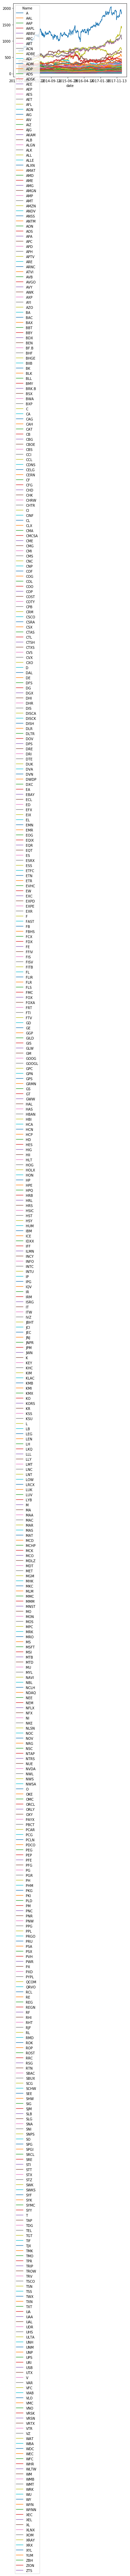

In [34]:
df.plot()

In [55]:
columns_na = df.isna().sum(axis=0) > 0

In [56]:
columns_na

Name
A       False
AAL     False
AAP     False
AAPL    False
ABBV    False
        ...  
XYL     False
YUM     False
ZBH     False
ZION    False
ZTS     False
Length: 505, dtype: bool

In [62]:
columns = df.columns

In [63]:
columns

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Name', length=505)

In [67]:
len(columns[columns_na])

35

In [68]:
505 -  35

470

In [71]:
df_clean = df.dropna(axis=1)
# df_clean = df.loc[:, df.isna().sum(axis=0) == 0]
df_clean

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


In [72]:
# Hacer datos estacionarios

In [74]:
logreturns = np.log(df_clean).diff().dropna()
logreturns

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-11,-0.010705,-0.019857,-0.006485,0.010368,-0.011096,-0.002776,-0.004369,-0.003279,-0.012346,0.008281,...,0.002476,-0.001334,-0.003731,-0.000700,0.003762,0.013566,-0.011552,-0.002640,0.002896,0.006334
2013-02-12,0.000448,-0.013227,0.002675,-0.025386,-0.012067,0.004268,0.001167,0.004097,0.006449,0.004115,...,0.003526,0.003198,0.002037,0.000700,-0.003762,0.017687,0.003094,-0.002780,0.011499,0.014329
2013-02-13,0.002909,0.026963,0.004696,-0.001905,-0.004244,-0.006838,0.004654,0.002586,-0.002059,-0.000216,...,0.000352,0.005837,0.002371,0.004887,0.005013,0.011030,-0.005265,0.007396,0.010156,-0.005647
2013-02-14,-0.003806,-0.046780,-0.001648,-0.000900,0.036195,0.002783,0.006940,-0.005863,-0.005167,0.006035,...,-0.007062,0.016789,-0.001693,-0.003954,0.003743,0.007404,-0.008106,0.004464,-0.004456,-0.008381
2013-02-15,-0.053681,0.035806,0.002027,-0.013876,0.027244,-0.003641,0.010891,0.013986,0.000647,-0.007874,...,0.015820,-0.008360,-0.001809,-0.002567,-0.007500,-0.006696,0.001564,-0.005780,-0.011844,0.021116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.008205,-0.008133,0.002561,0.002088,0.036056,-0.003820,0.000322,-0.001495,-0.001904,-0.002506,...,-0.001358,-0.007285,0.020072,-0.001316,-0.041274,0.035082,-0.007237,0.008382,0.017430,0.014106
2018-02-02,-0.021933,-0.033594,-0.029065,-0.044360,-0.010108,-0.033488,-0.007912,-0.022436,-0.018936,-0.028105,...,0.038917,-0.025852,-0.052316,-0.011094,-0.034797,0.010897,-0.016206,-0.018900,-0.015212,-0.013454
2018-02-05,-0.043457,-0.045954,-0.036377,-0.025302,-0.050393,-0.043855,-0.049171,-0.032847,-0.027832,-0.042525,...,-0.015014,-0.053352,-0.058586,-0.025634,-0.007935,-0.040459,-0.034849,-0.020967,-0.047268,-0.039179


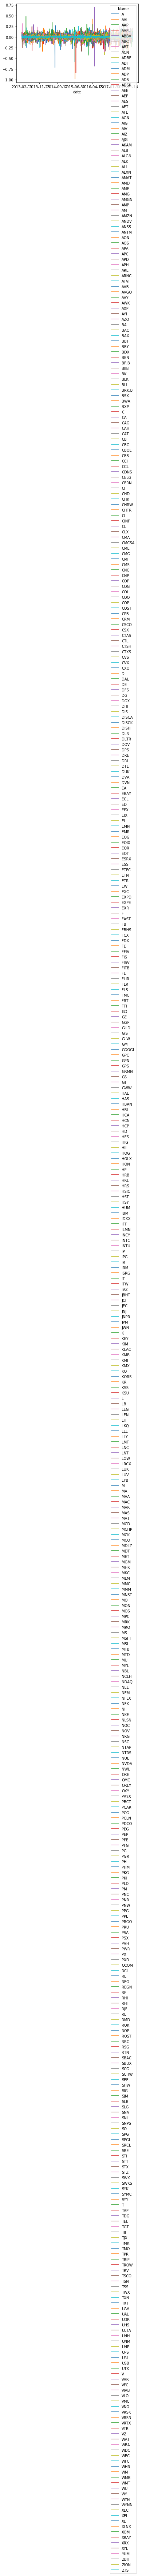

In [75]:
logreturns.plot()

In [84]:
df_clean.columns[(logreturns < -0.9).sum(axis=0) > 0]

Index(['NI'], dtype='object', name='Name')

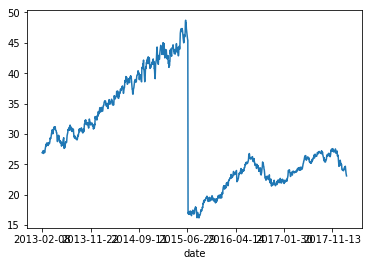

In [85]:
df_clean.loc[:, "NI"].plot()

In [86]:
# asumimos que no hay splits

In [87]:
# PCA!

In [90]:
from sklearn.decomposition import PCA

In [283]:
model = PCA()
components_of_df = model.fit_transform(X=logreturns)

In [106]:
components_of_df.shape

(1258, 470)

In [107]:
model.components_.shape

(470, 470)

In [108]:
model.components_[0]

array([-0.05232729, -0.06186165, -0.04063233, -0.03571688, -0.04426799,
       -0.03117885, -0.04195437, -0.04102843, -0.047447  , -0.0514796 ,
       -0.04417477, -0.03948561, -0.05234323, -0.05956226, -0.01909001,
       -0.01763452, -0.04453116, -0.04095821, -0.03780522, -0.04424965,
       -0.04895044, -0.02683818, -0.0390766 , -0.03516752, -0.05631016,
       -0.05207146, -0.05213661, -0.05341233, -0.03223088, -0.06063033,
       -0.05645073, -0.07126477, -0.04835647, -0.07189058, -0.04974139,
       -0.06675347, -0.03231203, -0.04507903, -0.05577531, -0.04411406,
       -0.03774045, -0.03791058, -0.05263937, -0.06862596, -0.07233256,
       -0.04368479, -0.04413568, -0.02800064, -0.06879084, -0.04502456,
       -0.02284859, -0.06030392, -0.04397272, -0.01694404, -0.04160925,
       -0.05339543, -0.03012542, -0.04443161, -0.06177178, -0.03088524,
       -0.04750409, -0.04940925, -0.03221069, -0.06314231, -0.03103669,
       -0.05670225, -0.05364647, -0.06049054, -0.03820449, -0.03

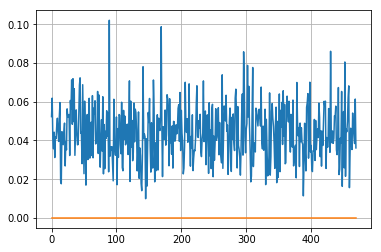

In [112]:
plt.plot(-model.components_[0])
plt.plot(model.components_[0]*0.)
plt.grid()

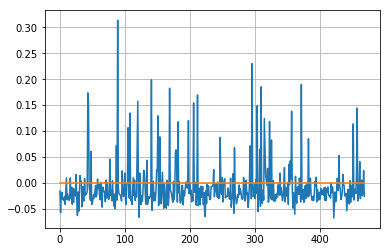

In [115]:
plt.plot(-model.components_[1])
plt.plot(model.components_[0]*0.)
plt.grid()

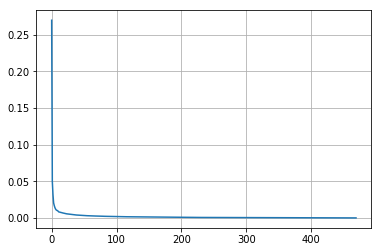

In [114]:
plt.plot(model.explained_variance_ratio_)
plt.grid()

In [116]:
# ahora estoy dispuesto a quedarme con el 90% de la varianza

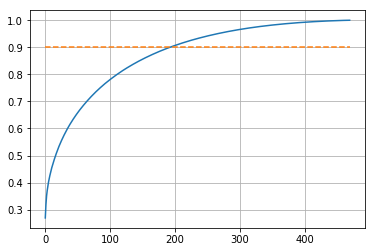

In [118]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.plot(np.ones(470)*0.9, '--')
plt.grid()

In [120]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.9)

192

In [121]:
# reduzco dimensionalidad a 192

In [123]:
model_truncated = PCA(n_components=192)
#df_reduced = components_of_df[:, :192]
df_reduced = model_truncated.fit_transform(logreturns)

In [124]:
df_reduced.shape

(1258, 192)

In [125]:
# visualize

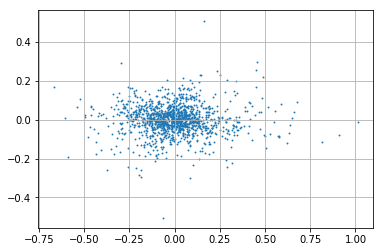

In [128]:
plt.scatter(x=df_reduced[:, 0], y=df_reduced[:, 1], s=0.8)
plt.grid()

In [129]:
logreturns.columns

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Name', length=470)

In [135]:
pca_A = model.transform(np.array([[1.] + [0.] * 469]))

In [136]:
pca_A.shape

(1, 470)

In [142]:
pca_A

array([[-4.36717285e-02,  9.86001904e-03,  1.51747203e-02,
        -3.84983603e-02,  2.58915037e-03,  1.25748836e-02,
         2.38119398e-02, -1.30484897e-02, -1.40314212e-02,
         2.07009685e-02,  2.32465169e-02,  9.88030806e-03,
        -1.50851281e-02, -3.87844642e-02, -2.39348630e-02,
        -6.13287159e-03,  2.21085881e-02, -1.24860272e-02,
         3.44852837e-02, -4.92712721e-02, -1.21013185e-02,
         1.77785333e-02, -7.58981317e-03,  9.32795022e-03,
         1.38859956e-02,  4.05479378e-02,  1.63073732e-03,
        -3.39448949e-02, -1.20366404e-02, -3.33199524e-02,
        -6.13943429e-02,  2.55837126e-02, -2.36997997e-02,
        -4.10799216e-04, -1.64614439e-03,  6.49714168e-04,
         4.26356860e-03, -9.34469981e-04, -1.77727542e-02,
         1.11823188e-03,  2.13907394e-02,  1.58340181e-02,
        -4.35895478e-02,  3.24318094e-02, -3.74433419e-02,
        -3.03415095e-02, -1.56603827e-02, -4.81578480e-02,
         5.52468375e-02, -6.52681400e-05, -6.85981271e-0

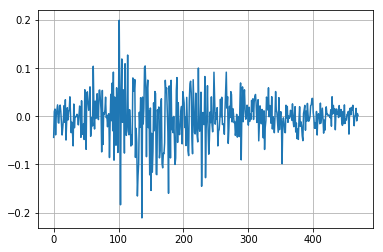

In [148]:
plt.plot(pca_A.T)
plt.grid()

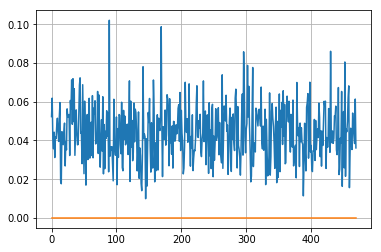

In [156]:
# "índice" del primer componente principal
plt.plot(-model.components_[0])
plt.plot(model.components_[0]*0.)
plt.grid()

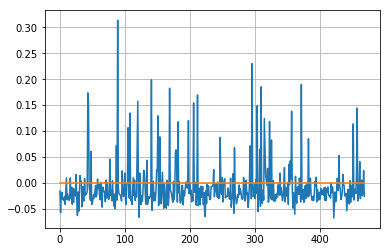

In [157]:
# "índice" del primer componente principal
plt.plot(-model.components_[1])
plt.plot(model.components_[0]*0.)
plt.grid()

# GMM

In [162]:
from sklearn.mixture import GaussianMixture

In [165]:
gmm = GaussianMixture(covariance_type="diag", n_components=2)

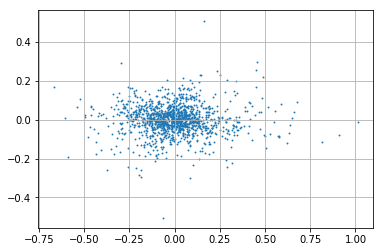

In [166]:
plt.scatter(components_of_df[:, 0], components_of_df[:, 1], s=0.8)
plt.grid()

In [167]:
gmm.fit(components_of_df[:, :2])

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [237]:
gmm.sample()

(array([[ 0.12774893, -0.15285044]]), array([0]))

In [265]:
xgrid = np.linspace(-1., 1., 50)
ygrid = np.linspace(-0.6, 0.6, 50)

In [266]:
xp, yp = np.meshgrid(xgrid, ygrid)

In [267]:
z = gmm.score_samples(np.vstack([xp.flatten(), yp.flatten()]).T)

In [268]:
zp = z.reshape(50,50)

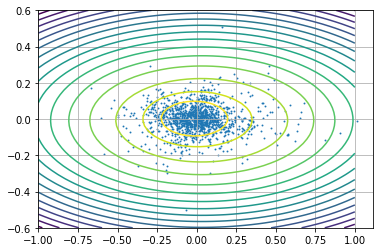

In [270]:
plt.contour(xp, yp, zp, 20)
plt.scatter(components_of_df[:, 0], components_of_df[:, 1], s=0.8)
plt.grid()

In [280]:
# log-likelihood de datos específicos
gmm.score_samples(components_of_df[2:5, :2])

# anomalía
gmm.score_samples(np.array([[-0.5, -0.4]]))

array([-7.68226698])

In [276]:
# log-likelihood the mi modelo
gmm.score(components_of_df[:, :2])

4.626182811841865

In [281]:
gmm.bic(components_of_df[:, :2])

-3789.6024107881544

## Ahora lo hacemos bien

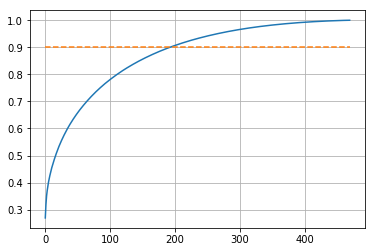

In [284]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.plot(np.ones(470)*0.9, '--')
plt.grid()

In [334]:
pca_200 = PCA(n_components=200).fit(logreturns)
components_200 = pca_200.transform(logreturns)

In [335]:
gmm_pca = GaussianMixture(n_components=3, covariance_type="diag")
gmm_pca.fit(components_200)
gmm_pca.bic(components_200)

-1376127.8258574242

In [336]:
n_components_options = np.arange(1, 20)
bic_list = []
for ncomp in n_components_options:
    print(ncomp)
    gmm_pca = GaussianMixture(n_components=ncomp, covariance_type="diag")
    gmm_pca.fit(components_200)
    bic_list.append(gmm_pca.bic(components_200))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


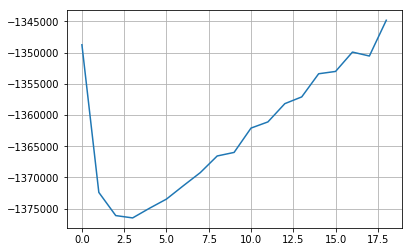

In [337]:
plt.plot(bic_list)
plt.grid()

In [338]:
bic_list

[-1348739.7110044232,
 -1372411.0004297558,
 -1376127.8258574242,
 -1376501.7805095813,
 -1374947.3593140726,
 -1373483.5157092416,
 -1371337.961991932,
 -1369240.0920285087,
 -1366570.719936794,
 -1365999.4037513435,
 -1362097.9142392413,
 -1361107.524882445,
 -1358179.4534792602,
 -1357097.5317878062,
 -1353387.7142050317,
 -1353015.0250996926,
 -1349910.4395553847,
 -1350541.3135118254,
 -1344805.7280500506]

In [339]:
# 4 componentes es el óptimo!
n_components_options = [2, 3, 4, 5, 6, 7]
cov_options = ["spherical", "diag", "full", "tied"]
bic_dict = {cov: [] for  cov in cov_options}
for ncomp in n_components_options:
    for cov in cov_options:
        print(ncomp, cov)
        gmm_pca = GaussianMixture(n_components=ncomp, covariance_type=cov)
        gmm_pca.fit(components_200)
        bic_dict[cov].append(gmm_pca.bic(components_200))

2 spherical
2 diag
2 full
2 tied
3 spherical
3 diag
3 full
3 tied
4 spherical
4 diag
4 full
4 tied
5 spherical
5 diag
5 full
5 tied
6 spherical
6 diag
6 full
6 tied
7 spherical
7 diag
7 full
7 tied


In [340]:
for cov in cov_options:
    print(cov, np.min(bic_dict[cov]))

spherical -1274193.5825720879
diag -1376501.7805095813
full -1100861.3538033406
tied -1205649.6116373849


In [341]:
print(n_components_options)
bic_dict["diag"]

[2, 3, 4, 5, 6, 7]


[-1372411.8465716941,
 -1376124.7802683949,
 -1376501.7805095813,
 -1374905.842752641,
 -1373335.2150037906,
 -1371014.6337742428]

In [444]:
# final model
gmm_pca = GaussianMixture(n_components=3, covariance_type="diag")
gmm_pca.fit(components_of_df[:, :200])

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [445]:
# simular el mercado

In [446]:
gmm_pca.sample()

(array([[ 1.79693852e-01, -7.54336198e-02,  6.31637954e-03,
         -2.54529599e-02,  1.79769260e-02,  2.91300462e-02,
         -1.09692488e-02, -2.06661301e-03,  4.75978499e-02,
         -3.50768310e-02,  9.69222221e-03,  2.79437273e-03,
          4.67348875e-02, -2.00279133e-02,  7.44717780e-03,
         -1.48835742e-02,  2.93763432e-03,  1.28013787e-02,
          2.21665492e-02, -2.78504532e-02, -2.68291341e-02,
          3.90119927e-02, -3.04185806e-03, -1.27211033e-02,
          2.93481668e-02, -1.32748424e-02, -4.63260852e-03,
          5.00055747e-03, -1.70801377e-02,  7.74240821e-03,
          1.07129023e-02,  2.65815046e-02, -8.64602777e-03,
         -5.74506721e-03, -1.55418559e-02, -1.44450137e-02,
         -2.00618681e-02,  1.95815220e-02,  6.73115462e-03,
         -7.00685218e-03,  1.86041035e-03, -1.10547640e-02,
         -5.10015569e-03, -9.90429771e-03,  1.61193293e-02,
          3.85905761e-03, -2.11591146e-02, -5.53829519e-03,
          1.40155741e-02, -2.03330058e-0

In [447]:
logreturns.shape

(1258, 470)

In [448]:
np.random.seed(405485)

In [449]:
pca_generated = gmm_pca.sample(1258)[0]

In [450]:
pca_generated.shape

(1258, 200)

In [451]:
logreturns_generated = pca_200.inverse_transform(pca_generated)

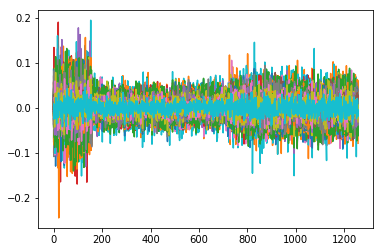

In [452]:
_ = plt.plot(logreturns_generated)

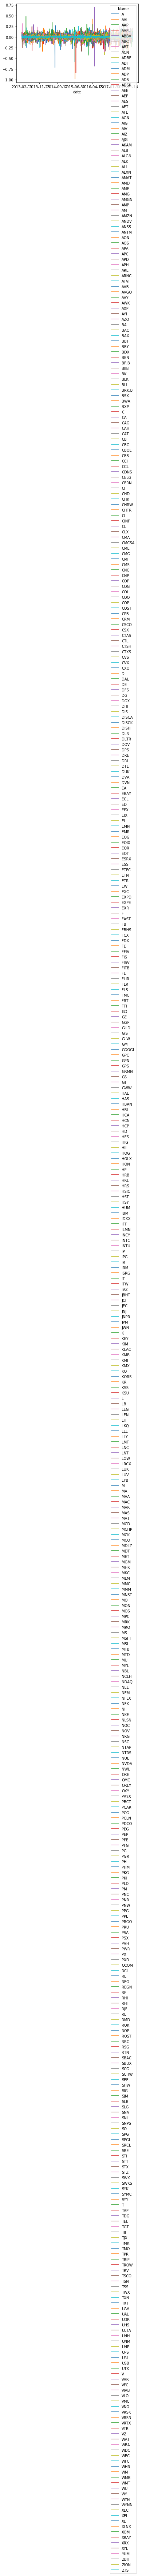

In [453]:
_ = logreturns.plot()

In [472]:
lr_for_cumsum = np.vstack([np.log(df_clean.values[0]).reshape(1, -1), logreturns_generated])
prices_generated = np.exp(np.cumsum(lr_for_cumsum, axis=0))

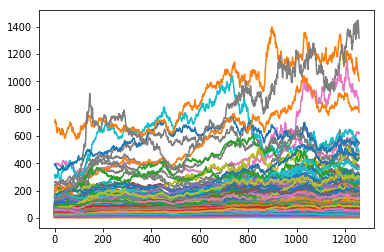

In [473]:
_ = plt.plot(prices_generated)

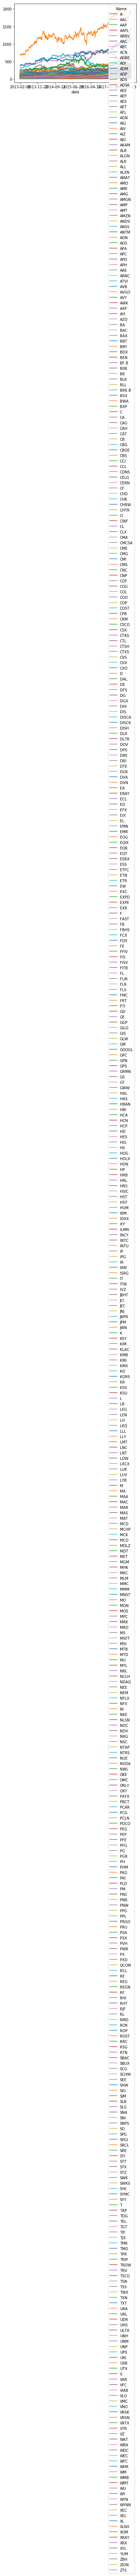

In [471]:
_ = df_clean.plot()

In [476]:
gmm_pca.means_

array([[ 9.28708611e-03, -8.94914942e-03,  1.20349452e-03,
         9.31870510e-03,  8.74522246e-03,  1.06584513e-02,
         5.35767276e-03,  6.65463160e-04, -4.26568569e-03,
         9.46955460e-03, -3.50648350e-03, -1.62668478e-03,
         4.03206772e-05,  5.88612984e-03,  2.22550149e-03,
         3.44006368e-03, -1.12586035e-03,  3.81903275e-03,
         1.80560893e-03, -4.49303238e-04, -2.00722266e-03,
        -3.24320403e-03,  2.92958336e-03,  4.71263463e-03,
        -4.91550741e-03, -4.33569252e-03, -4.45104313e-03,
         2.19116496e-03,  1.71409231e-03,  8.18055117e-03,
         1.26580057e-04,  3.23692268e-04,  1.39237992e-03,
         1.68890265e-03,  3.63963097e-03,  3.05551055e-03,
        -1.74904372e-03, -1.60899686e-03, -3.77896530e-05,
         1.35625371e-03,  2.38149191e-03,  1.20547172e-03,
         3.72425391e-03,  2.10437171e-03,  3.57230997e-03,
        -6.62001460e-03, -3.59264569e-03, -2.30233582e-03,
         2.69228652e-03,  5.72696714e-03,  3.97382148e-0